# Animal Classification Dataset - Exploratory Data Analysis

This notebook analyzes the Animals-10 dataset for image classification.

**Dataset:** Animals-10 from Kaggle  
**Classes:** dog, cat, horse, spider, butterfly, chicken, sheep, cow, squirrel, elephant  
**Link:** https://www.kaggle.com/datasets/alessiocorrado99/animals10

## 1. Import Libraries and Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Enable inline plotting
%matplotlib inline

## 2. Configuration

In [2]:
# Define paths and constants
OUTPUT_DIR = "eda_outputs"
DATA_DIR = "raw-img"  # Update this path to your dataset location
CLASSES = ['dog', 'horse', 'elephant', 'butterfly', 'chicken',
           'cat', 'cow', 'sheep', 'spider', 'squirrel']

# Create output directory if it doesn't exist
os.makedirs(OUTPUT_DIR, exist_ok=True)

print("=" * 80)
print("ANIMALS-10 DATASET - EXPLORATORY DATA ANALYSIS")
print("=" * 80)

ANIMALS-10 DATASET - EXPLORATORY DATA ANALYSIS


## 3. Class Distribution Analysis

Let's analyze how images are distributed across different animal classes.

In [3]:
# Count images per class
class_counts = {}
for class_name in CLASSES:
    class_path = os.path.join(DATA_DIR, class_name)
    if os.path.exists(class_path):
        count = len([f for f in os.listdir(class_path) 
                    if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        class_counts[class_name] = count
    else:
        class_counts[class_name] = 0

# Create DataFrame
df_distribution = pd.DataFrame(list(class_counts.items()), 
                               columns=['Class', 'Count'])
df_distribution = df_distribution.sort_values('Count', ascending=False)

print("\nClass Distribution:")
print("-" * 80)
print(df_distribution.to_string(index=False))
print(f"\nTotal images: {df_distribution['Count'].sum()}")
print(f"Average per class: {df_distribution['Count'].mean():.2f}")
print(f"Std deviation: {df_distribution['Count'].std():.2f}")


Class Distribution:
--------------------------------------------------------------------------------
    Class  Count
      dog   4863
   spider   4821
  chicken   3098
    horse   2623
butterfly   2112
      cow   1866
 squirrel   1862
    sheep   1820
      cat   1668
 elephant   1446

Total images: 26179
Average per class: 2617.90
Std deviation: 1266.21


### Visualize Class Distribution

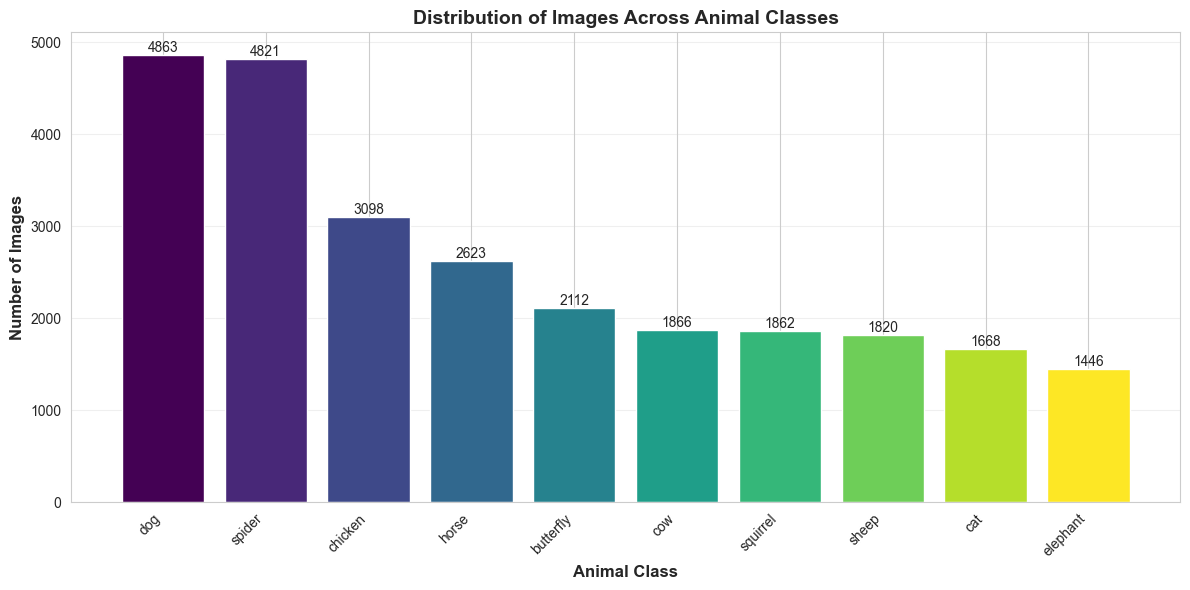

In [4]:
plt.figure(figsize=(12, 6))
bars = plt.bar(df_distribution['Class'], df_distribution['Count'], 
               color=plt.cm.viridis(np.linspace(0, 1, len(df_distribution))))
plt.xlabel('Animal Class', fontsize=12, fontweight='bold')
plt.ylabel('Number of Images', fontsize=12, fontweight='bold')
plt.title('Distribution of Images Across Animal Classes', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'class_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()

## 4. Image Dimension Analysis

Analyzing the dimensions and aspect ratios of images in the dataset.

In [5]:
# Sample images to analyze dimensions
widths, heights, aspects = [], [], []
sample_size = 100  # Sample 100 images per class

print("Analyzing image dimensions...")
for class_name in CLASSES:
    class_path = os.path.join(DATA_DIR, class_name)
    if not os.path.exists(class_path):
        continue
    
    images = [f for f in os.listdir(class_path) 
             if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    for img_file in images[:sample_size]:
        try:
            img_path = os.path.join(class_path, img_file)
            img = Image.open(img_path)
            w, h = img.size
            widths.append(w)
            heights.append(h)
            aspects.append(w / h)
        except Exception as e:
            continue

print(f"Analyzed {len(widths)} images")

Analyzing image dimensions...
Analyzed 1000 images


### Dimension Statistics

In [6]:
# Create dimension statistics
dim_stats = pd.DataFrame({
    'Metric': ['Mean Width', 'Mean Height', 'Min Width', 'Min Height', 
               'Max Width', 'Max Height', 'Mean Aspect Ratio'],
    'Value': [
        f"{np.mean(widths):.2f}",
        f"{np.mean(heights):.2f}",
        f"{np.min(widths)}",
        f"{np.min(heights)}",
        f"{np.max(widths)}",
        f"{np.max(heights)}",
        f"{np.mean(aspects):.2f}"
    ]
})

print("\nDimension Statistics:")
print("-" * 80)
print(dim_stats.to_string(index=False))


Dimension Statistics:
--------------------------------------------------------------------------------
           Metric  Value
       Mean Width 423.04
      Mean Height 317.14
        Min Width    112
       Min Height     96
        Max Width    640
       Max Height    640
Mean Aspect Ratio   1.35


### Visualize Dimensions

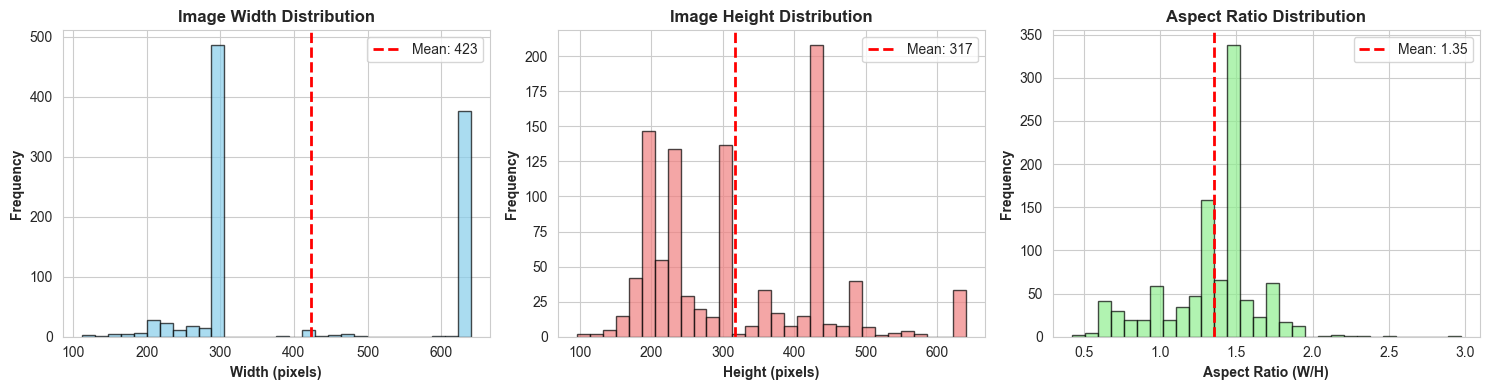

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Width distribution
axes[0].hist(widths, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Width (pixels)', fontweight='bold')
axes[0].set_ylabel('Frequency', fontweight='bold')
axes[0].set_title('Image Width Distribution', fontweight='bold')
axes[0].axvline(np.mean(widths), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(widths):.0f}')
axes[0].legend()

# Height distribution
axes[1].hist(heights, bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Height (pixels)', fontweight='bold')
axes[1].set_ylabel('Frequency', fontweight='bold')
axes[1].set_title('Image Height Distribution', fontweight='bold')
axes[1].axvline(np.mean(heights), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(heights):.0f}')
axes[1].legend()

# Aspect ratio distribution
axes[2].hist(aspects, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[2].set_xlabel('Aspect Ratio (W/H)', fontweight='bold')
axes[2].set_ylabel('Frequency', fontweight='bold')
axes[2].set_title('Aspect Ratio Distribution', fontweight='bold')
axes[2].axvline(np.mean(aspects), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(aspects):.2f}')
axes[2].legend()

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'image_dimensions.png'), dpi=300, bbox_inches='tight')
plt.show()

## 5. Sample Images Visualization

Display one sample image from each class.

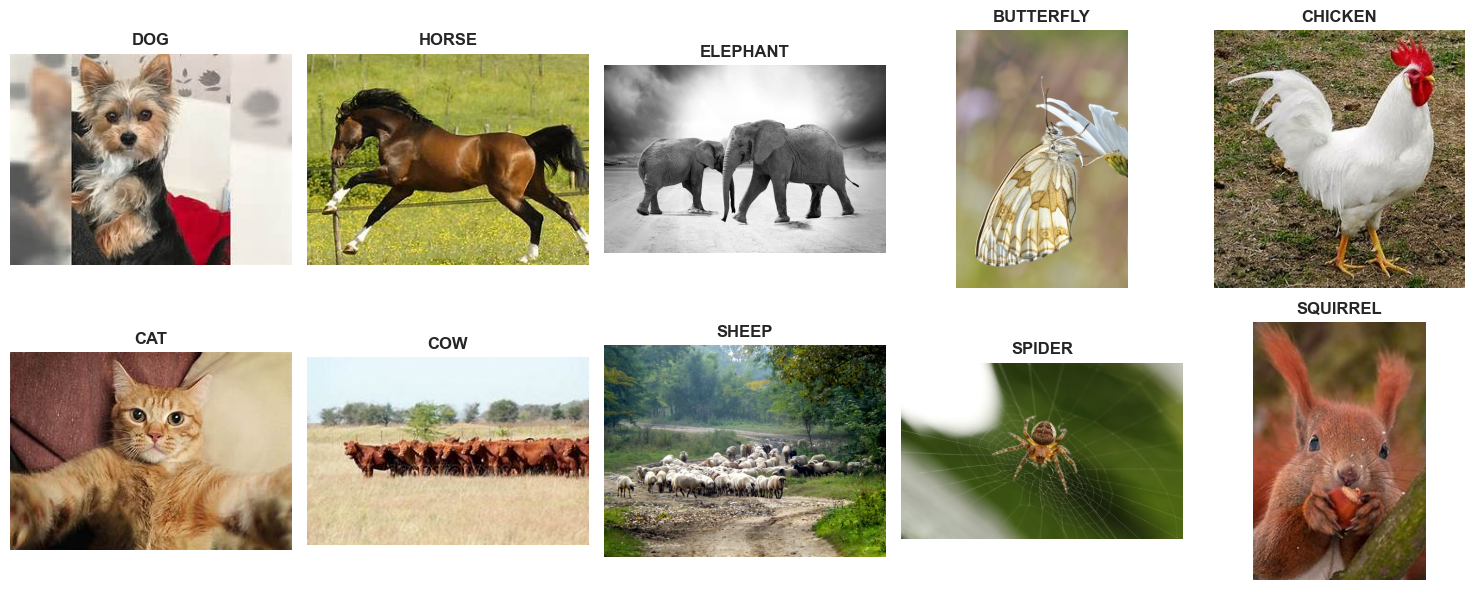

In [8]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for idx, class_name in enumerate(CLASSES):
    class_path = os.path.join(DATA_DIR, class_name)
    if not os.path.exists(class_path):
        continue
    
    images = [f for f in os.listdir(class_path) 
             if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    if images:
        img_path = os.path.join(class_path, images[0])
        img = Image.open(img_path)
        axes[idx].imshow(img)
        axes[idx].set_title(class_name.upper(), 
                           fontweight='bold', fontsize=12)
        axes[idx].axis('off')

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'sample_images.png'), dpi=300, bbox_inches='tight')
plt.show()

## 6. Recommendations for Model Training

Based on the exploratory data analysis, here are recommendations for training a classification model.

### 1. IMAGE PREPROCESSING:
- Resize all images to 224x224 (standard for transfer learning. Mean width and height are close to this value)
- Apply data augmentation to handle class imbalance
- Normalize pixel values using ImageNet statistics

### 2. DATA SPLITTING:
- Use 80% for training, 10% for validation, 10% for testing
- Apply stratified splitting to maintain class distribution

### 3. MODEL ARCHITECTURE:
- Use transfer learning with ResNet50 or EfficientNet
- Fine-tune the last few layers
- Add dropout for regularization

### 4. TRAINING STRATEGY:
- Use class weights to handle imbalance
- Apply learning rate scheduling
- Use early stopping based on validation loss

### 5. DATA AUGMENTATION:
- Random horizontal flips
- Random rotation (±15 degrees)
- Random brightness/contrast adjustments
- Random crops and zooms

## 7. Export Metadata

Save the analysis results to CSV files for future reference.

In [9]:
# Save class distribution
df_distribution.to_csv(os.path.join(OUTPUT_DIR, 'class_distribution.csv'), index=False)

# Save dimension statistics
pd.DataFrame({
    'widths': widths,
    'heights': heights,
    'aspects': aspects
}).to_csv(os.path.join(OUTPUT_DIR, 'image_dimensions.csv'), index=False)

print("\n" + "=" * 80)
print("EDA COMPLETE - Files saved:")
print("  - class_distribution.png")
print("  - image_dimensions.png")
print("  - sample_images.png")
print("  - class_distribution.csv")
print("  - image_dimensions.csv")
print("=" * 80)


EDA COMPLETE - Files saved:
  - class_distribution.png
  - image_dimensions.png
  - sample_images.png
  - class_distribution.csv
  - image_dimensions.csv
